In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib.pyplot import figure
from sqlalchemy import func

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")



In [5]:
# reflect an existing database into a new model

Base = automap_base()

Base.prepare(engine, reflect=True)

# reflect the tables

Base.classes.keys()



['measurement', 'station']

In [6]:
# View all of the classes that automap found
Measurement = Base.classes.measurement

Station = Base.classes.station

session = Session(engine)

first_row = session.query(Measurement).first()
first_row.__dict__

first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fafce37cdf0>,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [7]:
results = session.query(Measurement).first()
results.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fafce37c4f0>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08}

In [8]:
first_row = session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fafce37c4f0>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08}

In [9]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

session

# Exploratory Precipitation Analysis

In [11]:
# results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
#garbage_light = session.query(Garbage).order_by(Garbage.weight).first()
#session.query(Ticker).order_by(desc('updated')).first()
recent_date

rd = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

rd



('2017-08-23',)

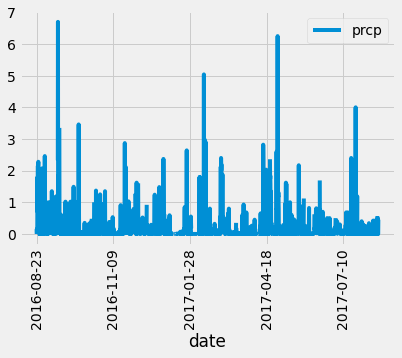

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

prev_year

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

date_prcp_df = pd.DataFrame(date_prcp, columns=['date', 'prcp'])
date_prcp_df

date_prcp_df.set_index('date', inplace=True)
date_prcp_df


# Sort the dataframe by date

sorted_df = date_prcp_df.sort_values(by=['date'], ascending=True)
sorted_df
# Use Pandas Plotting with Matplotlib to plot the data

sorted_df.plot()
plt.xticks(rotation = 90) 

plt.show()



In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset

rows = session.query(func.count(Station.station)).scalar()
rows
#rows_df = pd.DataFrame(rows, columns=['station'])

# column = session.query(Station).all()
# rows_df = pd.DataFrame(column, columns=['station'])



9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# active_station = session.query(Measurement).group_by(\
#     Measurement.station)
# active_station    

station_gb = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

station_gb.all()
# order_by = order_by(func.sum(Items.UnitPrice * Items.Quantity).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_max = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.station).all()

active_max

active_min = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.station).all()

active_min

active_avg = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.station).all()

print(f'Highest Temp',active_max)
print(f'Lowest Temp',active_min)
print(f'Average Temp',active_avg)


Highest Temp [('USC00519281', 85.0)]
Lowest Temp [('USC00519281', 54.0)]
Average Temp [('USC00519281', 71.66378066378067)]


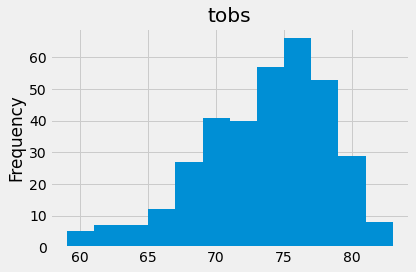

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).\
order_by(Measurement.station).all()

station_temp


# date_prcp = session.query(Measurement.date, Measurement.prcp).\
#     filter(Measurement.date >= prev_year).\
#     order_by(Measurement.date).all()
station_temp_df = pd.DataFrame(station_temp, columns=['station', 'date', 'tobs'])

station_temp_df.hist(bins=12)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [18]:
station_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).\
order_by(Measurement.station).all()

station_temp


[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

# Close session

In [19]:
# Close Session
session.close()